In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('data/simpay.csv', chunksize=0.5e5)
for chunk in df:
    # Process the chunk (e.g., save it to a separate file)
    df = chunk.copy()
    break

In [3]:
df.head(n = 50)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1      1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2      1  TRANSFER     181.00  C1305486145         181.00            0.00   
3      1  CASH_OUT     181.00   C840083671         181.00            0.00   
4      1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
5      1   PAYMENT    7817.71    C90045638       53860.00        46042.29   
6      1   PAYMENT    7107.77   C154988899      183195.00       176087.23   
7      1   PAYMENT    7861.64  C1912850431      176087.23       168225.59   
8      1   PAYMENT    4024.36  C1265012928        2671.00            0.00   
9      1     DEBIT    5337.77   C712410124       41720.00        36382.23   
10     1     DEBIT    9644.94  C1900366749        4465.00            0.00   
11     1   PAYMENT    3099.97   C249177573       20771.00        17671.03   
12     1   PAYMENT    2560.74  C1648232591        5070.00         2509.26   
13     1   PAYMENT   11633.76  C1716932897       10127.00            0.00   
14     1   PAYMENT    4098.78  C1026483832      503264.00       499165.22   
15     1  CASH_OUT  229133.94   C905080434       15325.00            0.00   
16     1   PAYMENT    1563.82   C761750706         450.00            0.00   
17     1   PAYMENT    1157.86  C1237762639       21156.00        19998.14   
18     1   PAYMENT     671.64  C2033524545       15123.00        14451.36   
19     1  TRANSFER  215310.30  C1670993182         705.00            0.00   
20     1   PAYMENT    1373.43    C20804602       13854.00        12480.57   
21     1     DEBIT    9302.79  C1566511282       11299.00         1996.21   
22     1     DEBIT    1065.41  C1959239586        1817.00          751.59   
23     1   PAYMENT    3876.41   C504336483       67852.00        63975.59   
24     1  TRANSFER  311685.89  C1984094095       10835.00            0.00   
25     1   PAYMENT    6061.13  C1043358826         443.00            0.00   
26     1   PAYMENT    9478.39  C1671590089      116494.00       107015.61   
27     1   PAYMENT    8009.09  C1053967012       10968.00         2958.91   
28     1   PAYMENT    8901.99  C1632497828        2958.91            0.00   
29     1   PAYMENT    9920.52   C764826684           0.00            0.00   
30     1   PAYMENT    3448.92  C2103763750           0.00            0.00   
31     1   PAYMENT    4206.84   C215078753           0.00            0.00   
32     1   PAYMENT    5885.56   C840514538           0.00            0.00   
33     1   PAYMENT    5307.88  C1768242710           0.00            0.00   
34     1   PAYMENT    5031.22   C247113419           0.00            0.00   
35     1   PAYMENT   24213.67  C1238616099           0.00            0.00   
36     1   PAYMENT    8603.42  C1608633989         253.00            0.00   
37     1   PAYMENT    2791.42   C923341586      300481.00       297689.58   
38     1   PAYMENT    7413.54  C1470868839      297689.58       290276.03   
39     1   PAYMENT    3295.19   C711197015      233633.00       230337.81   
40     1   PAYMENT    1684.81  C1481594086         297.00            0.00   
41     1     DEBIT    5758.59  C1466917878       32604.00        26845.41   
42     1  CASH_OUT  110414.71   C768216420       26845.41            0.00   
43     1   PAYMENT    7823.46   C260084831         998.00            0.00   
44     1   PAYMENT    5086.48   C598357562           0.00            0.00   
45     1   PAYMENT    5281.48  C1440738283      152019.00       146737.52   
46     1   PAYMENT   13875.98   C484199463       15818.00         1942.02   
47     1  CASH_OUT   56953.90  C1570470538        1942.02            0.00   
48     1  CASH_OUT    5346.89   C512549200           0.00            0.00   
49     1   PAYMENT    2204.04  C1615801298         586.00            0.00   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            50000 non-null  int64  
 1   type            50000 non-null  object 
 2   amount          50000 non-null  float64
 3   nameOrig        50000 non-null  object 
 4   oldbalanceOrg   50000 non-null  float64
 5   newbalanceOrig  50000 non-null  float64
 6   nameDest        50000 non-null  object 
 7   oldbalanceDest  50000 non-null  float64
 8   newbalanceDest  50000 non-null  float64
 9   isFraud         50000 non-null  int64  
 10  isFlaggedFraud  50000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 4.2+ MB


In [5]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  50000.000000  5.000000e+04   5.000000e+04    5.000000e+04   
mean       7.453800  1.562645e+05   7.333083e+05    7.472741e+05   
std        2.056636  3.243949e+05   2.202405e+06    2.239971e+06   
min        1.000000  6.300000e-01   0.000000e+00    0.000000e+00   
25%        7.000000  7.734573e+03   0.000000e+00    0.000000e+00   
50%        8.000000  3.341482e+04   1.703072e+04    0.000000e+00   
75%        9.000000  1.878390e+05   1.331716e+05    1.438734e+05   
max        9.000000  1.000000e+07   2.854724e+07    2.861740e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    5.000000e+04    5.000000e+04  50000.000000         50000.0  
mean     8.444671e+05    1.164400e+06      0.002000             0.0  
std      2.433388e+06    2.915203e+06      0.044677             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00      0.000000             0.0  
50%      2.126000e+03    0.000000e+00      0.000000             0.0  
75%      4.632050e+05    8.649264e+05      0.000000             0.0  
max      3.014320e+07    3.197699e+07      1.000000             0.0

In [39]:
def wrangle_data(df):
    df = df.drop(columns=['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])
    for window in [10]:
        for name in ['nameDest']:
            df[f'{name}_ma{window}'] = (
                df.groupby(name)['amount']
                  .rolling(window=window)
                  .mean()
                  .reset_index(level=0, drop=True)
            )
            df[f'{name}_ma{window}'] = df[f'{name}_ma{window}'].replace(np.nan, 0)
    return df
df_wrangled = wrangle_data(df)

In [40]:
df_wrangled.head(n = 50)

step      type     amount     nameOrig     nameDest  isFraud  \
0      1   PAYMENT    9839.64  C1231006815  M1979787155        0   
1      1   PAYMENT    1864.28  C1666544295  M2044282225        0   
2      1  TRANSFER     181.00  C1305486145   C553264065        1   
3      1  CASH_OUT     181.00   C840083671    C38997010        1   
4      1   PAYMENT   11668.14  C2048537720  M1230701703        0   
5      1   PAYMENT    7817.71    C90045638   M573487274        0   
6      1   PAYMENT    7107.77   C154988899   M408069119        0   
7      1   PAYMENT    7861.64  C1912850431   M633326333        0   
8      1   PAYMENT    4024.36  C1265012928  M1176932104        0   
9      1     DEBIT    5337.77   C712410124   C195600860        0   
10     1     DEBIT    9644.94  C1900366749   C997608398        0   
11     1   PAYMENT    3099.97   C249177573  M2096539129        0   
12     1   PAYMENT    2560.74  C1648232591   M972865270        0   
13     1   PAYMENT   11633.76  C1716932897   M801569151        0   
14     1   PAYMENT    4098.78  C1026483832  M1635378213        0   
15     1  CASH_OUT  229133.94   C905080434   C476402209        0   
16     1   PAYMENT    1563.82   C761750706  M1731217984        0   
17     1   PAYMENT    1157.86  C1237762639  M1877062907        0   
18     1   PAYMENT     671.64  C2033524545   M473053293        0   
19     1  TRANSFER  215310.30  C1670993182  C1100439041        0   
20     1   PAYMENT    1373.43    C20804602  M1344519051        0   
21     1     DEBIT    9302.79  C1566511282  C1973538135        0   
22     1     DEBIT    1065.41  C1959239586   C515132998        0   
23     1   PAYMENT    3876.41   C504336483  M1404932042        0   
24     1  TRANSFER  311685.89  C1984094095   C932583850        0   
25     1   PAYMENT    6061.13  C1043358826  M1558079303        0   
26     1   PAYMENT    9478.39  C1671590089    M58488213        0   
27     1   PAYMENT    8009.09  C1053967012   M295304806        0   
28     1   PAYMENT    8901.99  C1632497828    M33419717        0   
29     1   PAYMENT    9920.52   C764826684  M1940055334        0   
30     1   PAYMENT    3448.92  C2103763750   M335107734        0   
31     1   PAYMENT    4206.84   C215078753  M1757317128        0   
32     1   PAYMENT    5885.56   C840514538  M1804441305        0   
33     1   PAYMENT    5307.88  C1768242710  M1971783162        0   
34     1   PAYMENT    5031.22   C247113419   M151442075        0   
35     1   PAYMENT   24213.67  C1238616099    M70695990        0   
36     1   PAYMENT    8603.42  C1608633989  M1615617512        0   
37     1   PAYMENT    2791.42   C923341586   M107994825        0   
38     1   PAYMENT    7413.54  C1470868839  M1426725223        0   
39     1   PAYMENT    3295.19   C711197015  M1384454980        0   
40     1   PAYMENT    1684.81  C1481594086  M1569435561        0   
41     1     DEBIT    5758.59  C1466917878  C1297685781        0   
42     1  CASH_OUT  110414.71   C768216420  C1509514333        0   
43     1   PAYMENT    7823.46   C260084831   M267814113        0   
44     1   PAYMENT    5086.48   C598357562  M1593224710        0   
45     1   PAYMENT    5281.48  C1440738283  M1849015357        0   
46     1   PAYMENT   13875.98   C484199463  M2008106788        0   
47     1  CASH_OUT   56953.90  C1570470538   C824009085        0   
48     1  CASH_OUT    5346.89   C512549200   C248609774        0   
49     1   PAYMENT    2204.04  C1615801298   M490391704        0   

    isFlaggedFraud  nameDest_ma10  
0                0            0.0  
1                0            0.0  
2                0            0.0  
3                0            0.0  
4                0            0.0  
5                0            0.0  
6                0            0.0  
7                0            0.0  
8                0            0.0  
9                0            0.0  
10               0            0.0  
11               0            0.0  
12               0            0.0  
13               0            0

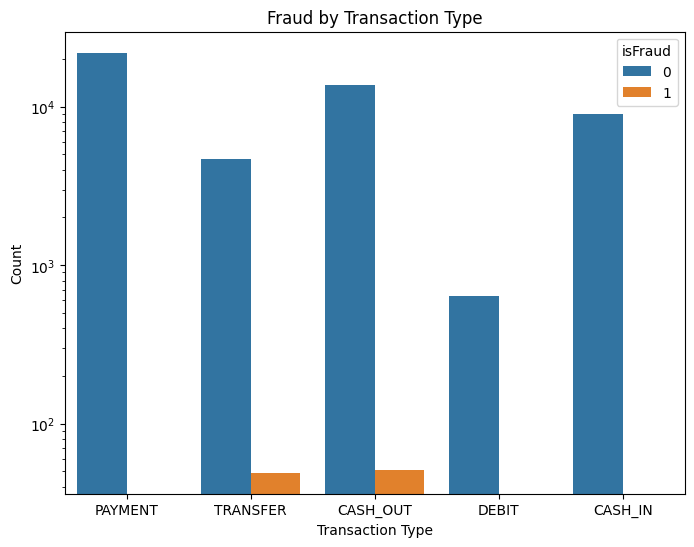

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='type', hue='isFraud', data=df_wrangled, ax=ax)
ax.set_yscale('log')
ax.set_title('Fraud by Transaction Type')
ax.set_ylabel('Count')
ax.set_xlabel('Transaction Type');

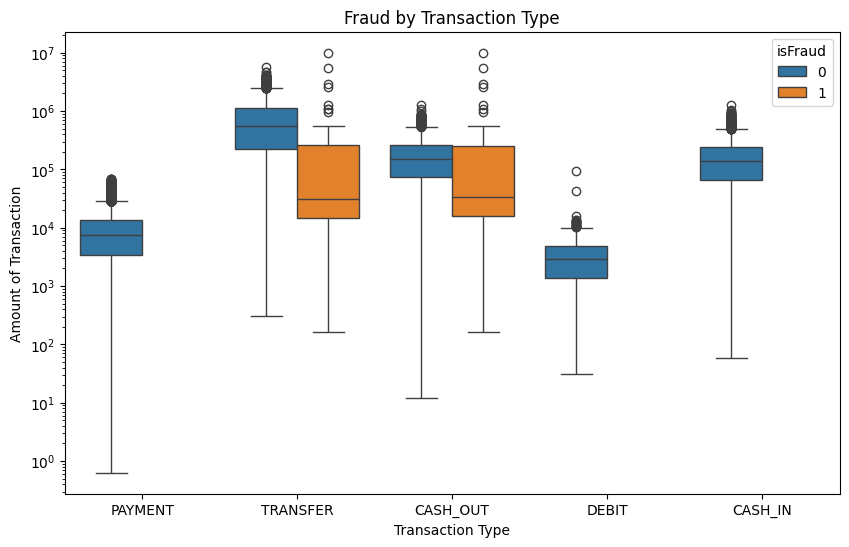

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df_wrangled, ax=ax)
ax.set_yscale('log')
ax.set_title('Fraud by Transaction Type')
ax.set_ylabel('Amount of Transaction')
ax.set_xlabel('Transaction Type');

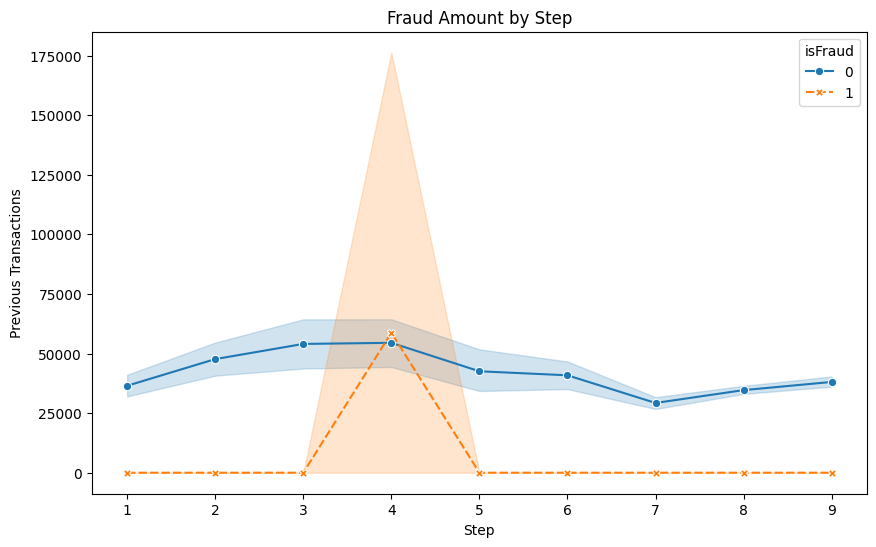

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x='step', y='nameDest_ma10',hue = 'isFraud', data=df_wrangled, ax=ax, estimator='mean', markers=True, style="isFraud")
ax.set_title('Fraud Amount by Step')
ax.set_ylabel('Previous Transactions')
ax.set_xlabel('Step');

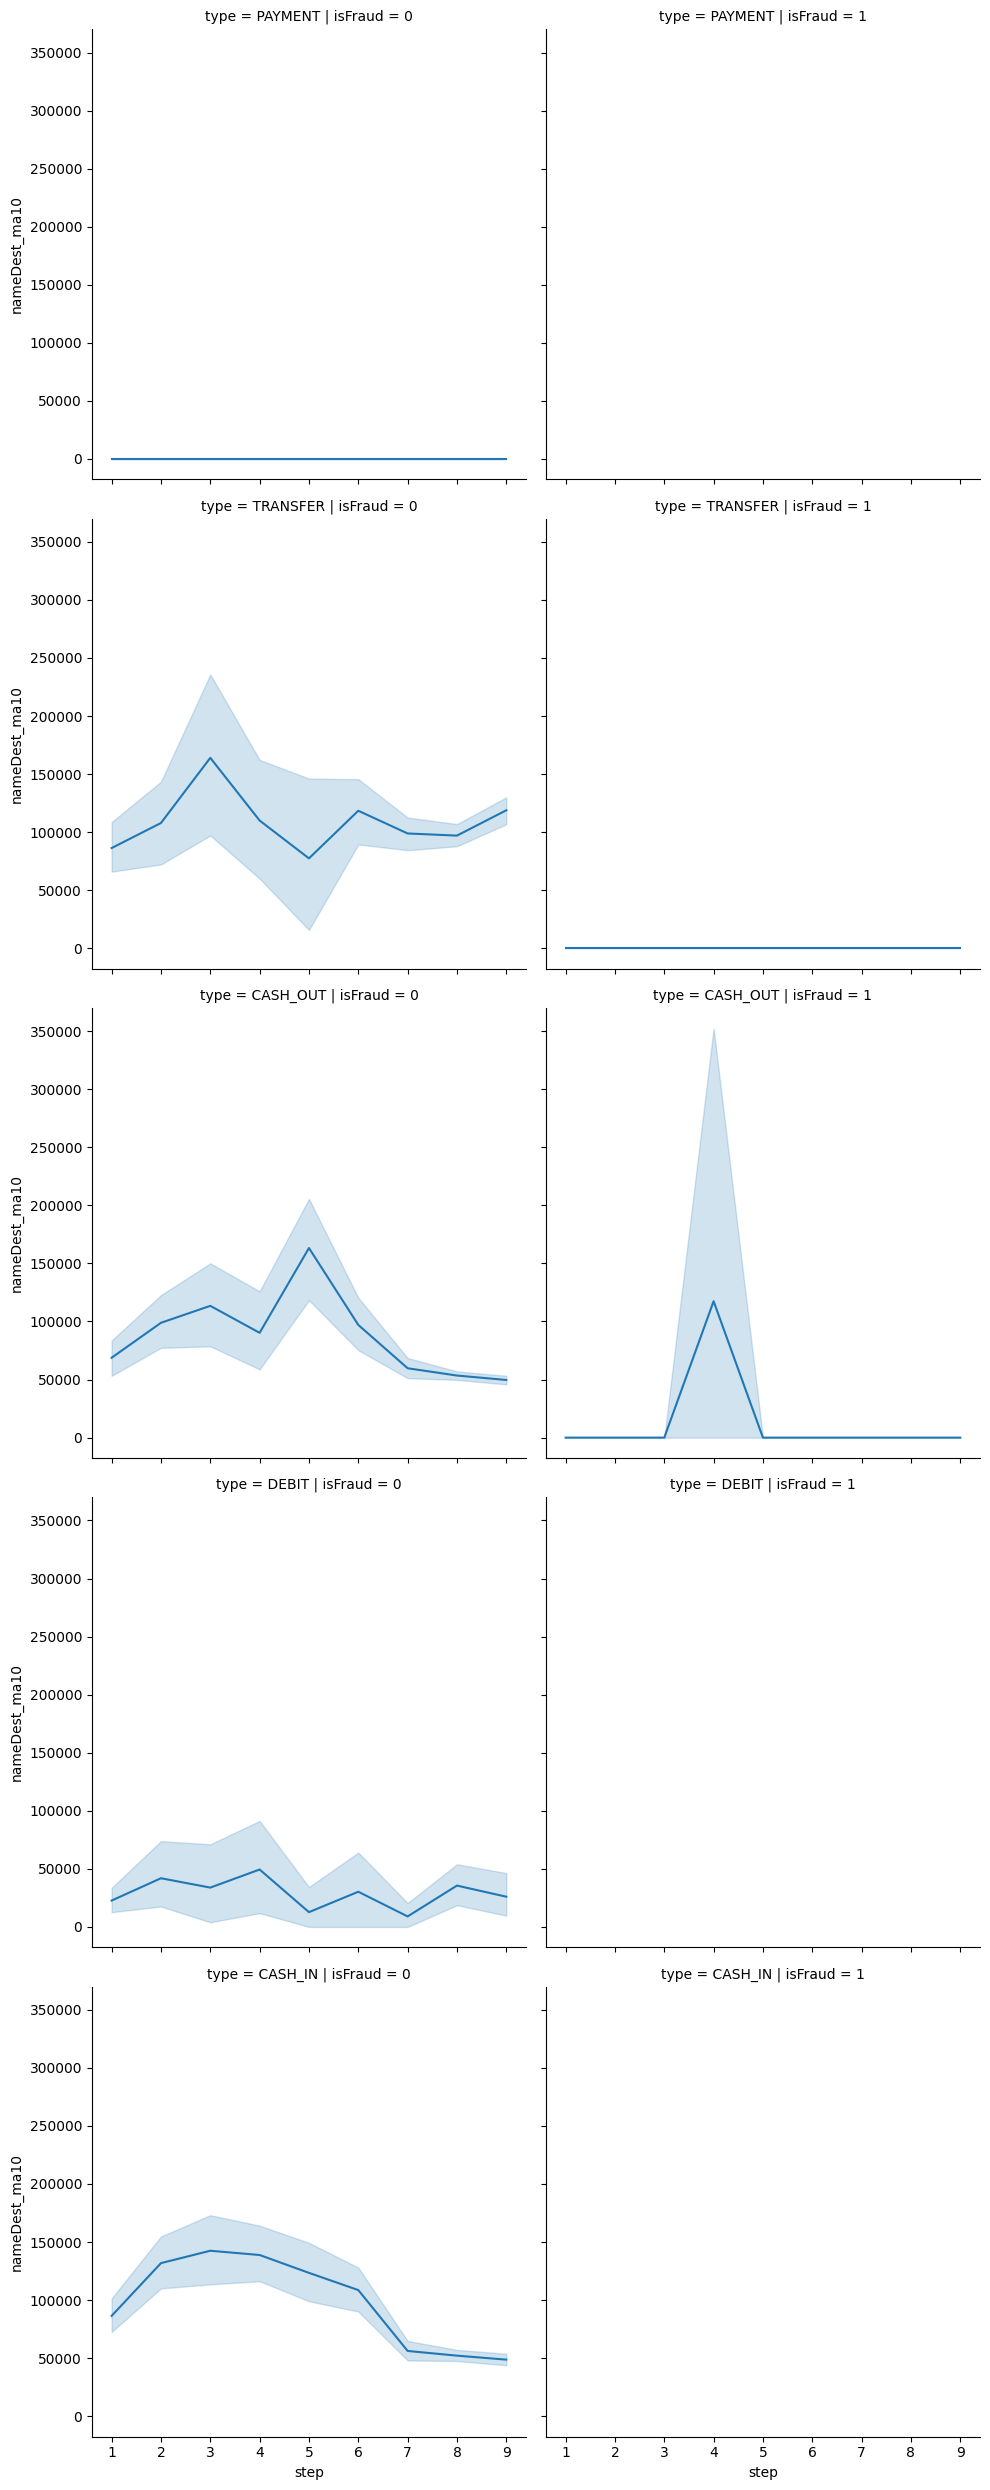

In [22]:
sns.relplot(x='step', y='nameDest_ma10', data=df_wrangled, kind = 'line', col = 'isFraud', row = 'type')

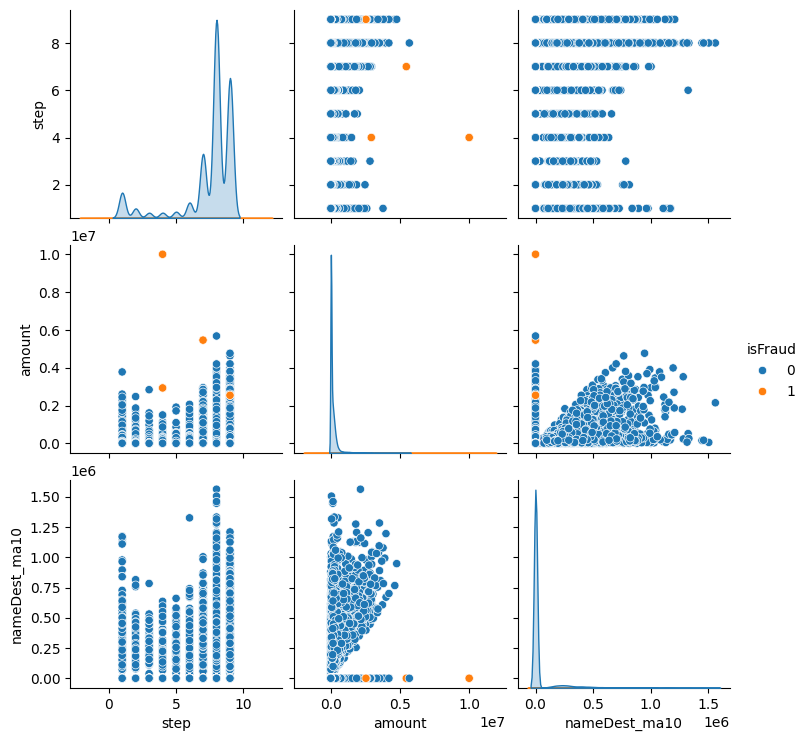

In [41]:
sns.pairplot(data=df_wrangled.drop(columns=['nameOrig','nameDest','isFlaggedFraud']), hue="isFraud")

<Axes: >

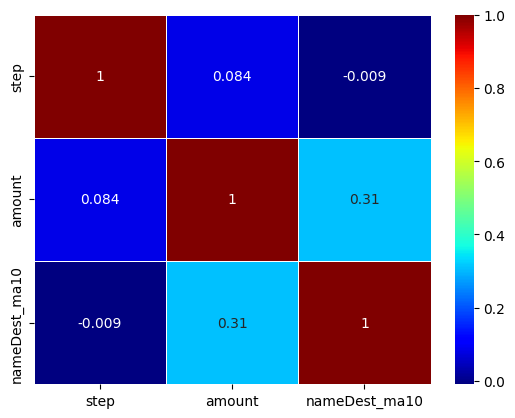

In [43]:
corr = df_wrangled.drop(columns=['nameOrig','type','nameDest','isFraud', 'isFlaggedFraud']).corr()
sns.heatmap(corr, cmap = 'jet', annot=True, linewidths=.5)

In [80]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler, CondensedNearestNeighbour, TomekLinks
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df_wrangled_model = df_wrangled[df_wrangled['type'].isin(['TRANSFER', 'CASH_OUT'])]
X = df_wrangled_model.drop(columns=['nameOrig','nameDest','isFraud', 'isFlaggedFraud'])
y = df_wrangled_model['isFraud']
cat_features = X.select_dtypes(include = 'object').columns.tolist()
print(cat_features)
num_features = X.select_dtypes(include = 'number').columns.tolist()
print(num_features)
column_trans = ColumnTransformer(
    [('cat', OneHotEncoder(dtype='int',  handle_unknown = "ignore"), cat_features),
     ('num', PowerTransformer(), num_features)])

['type']
['step', 'amount', 'nameDest_ma10']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [87]:
inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
hgbc = HistGradientBoostingClassifier(random_state=42, class_weight='balanced')
hgbc_params = {
    'histgradientboostingclassifier__max_iter': [100, 200, 300, 500],
    'histgradientboostingclassifier__max_depth': [2, 3, 5, 10, None],  # None allows unlimited depth
    'histgradientboostingclassifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'histgradientboostingclassifier__min_samples_leaf': [10, 20, 50],
    'histgradientboostingclassifier__l2_regularization': [0, 1e-3, 1e-1]
}
resampler = SMOTEENN() # SMOTEENN(), SMOTETomek(), TomekLinks(), CondensedNearestNeighbour(), RandomUnderSampler()
model = GridSearchCV(make_pipeline(column_trans,resampler,hgbc), hgbc_params, cv = inner_cv, scoring='f1', n_jobs=5, verbose=0)
model.fit(X_train, y_train)

/home/sonhaile/miniconda3/envs/data_engineering/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/sonhaile/miniconda3/envs/data_engineering/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/home/sonhaile/miniconda3/envs/data_engineering/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(dtype='int',
                                                                                       handle_unknown='ignore'),
                                                                         ['type']),
                                                                        ('num',
                                                                         PowerTransformer(),
                                                                         ['step',
                                                                          'amount',
                                                                          'nameDest_ma10'])])),
                                       ('smoteenn', SMOTEENN()),
                                       ('histgradientboostingclassifier',
                                        HistGrad...
             n_jobs=5,
             param_grid={'histgradientboostingclassifier__l2_regularization': [0,
                                                                               0.001,
                                                                               0.1],
                         'histgradientboostingclassifier__learning_rate': [0.01,
                                                                           0.05,
                                                                           0.1,
                                                                           0.2],
                         'histgradientboostingclassifier__max_depth': [2, 3, 5,
                                                                       10,
                                                                       None],
                         'histgradientboostingclassifier__max_iter': [100, 200,
                                                                      300,
                                                                      500],
                         'histgradientboostingclassifier__min_samples_leaf': [10,
                                                                              20,
                                                                              50]},
             scoring='f1')

               precision    recall  f1-score   support

Not fraud (0)       1.00      0.96      0.98     14684
    Fraud (1)       0.10      0.86      0.18        80

     accuracy                           0.96     14764
    macro avg       0.55      0.91      0.58     14764
 weighted avg       0.99      0.96      0.97     14764



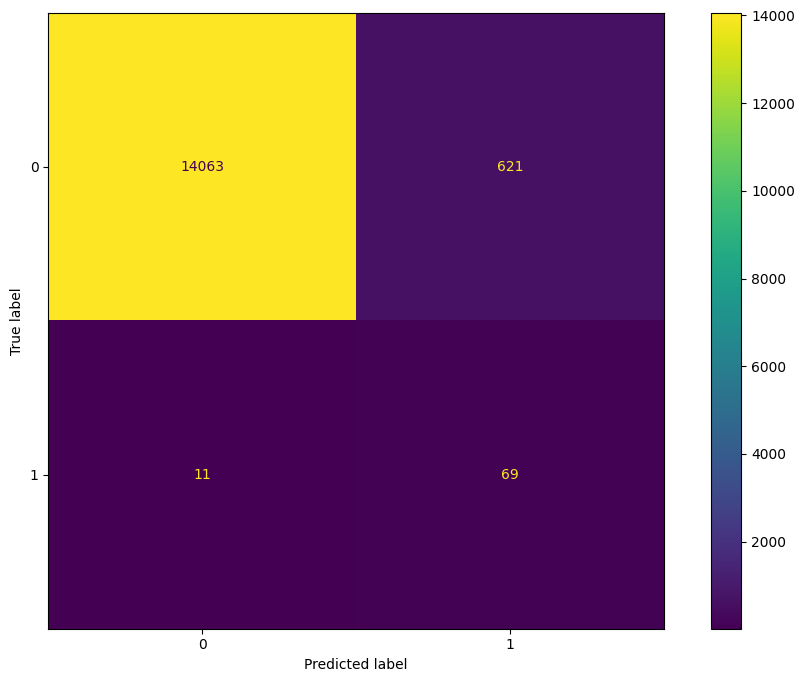

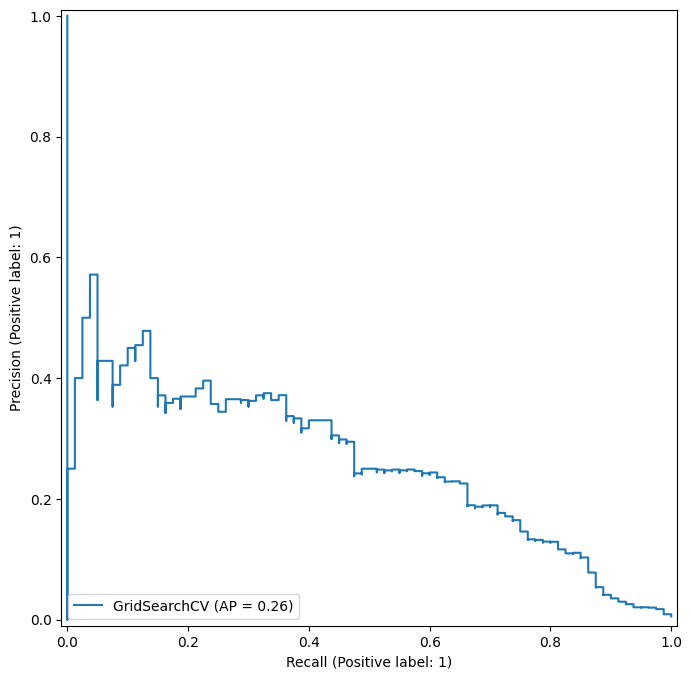

In [88]:
fig, ax = plt.subplots(figsize = (12, 8))
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred,target_names=['Not fraud (0)', 'Fraud (1)']))
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay.from_estimator(model,X_train,y_train, ax = ax)
fig, ax = plt.subplots(figsize = (12, 8))
disp = PrecisionRecallDisplay.from_estimator(model,X_train,y_train, ax = ax)

               precision    recall  f1-score   support

Not fraud (0)       1.00      0.96      0.98      3672
    Fraud (1)       0.10      0.75      0.18        20

     accuracy                           0.96      3692
    macro avg       0.55      0.86      0.58      3692
 weighted avg       0.99      0.96      0.98      3692



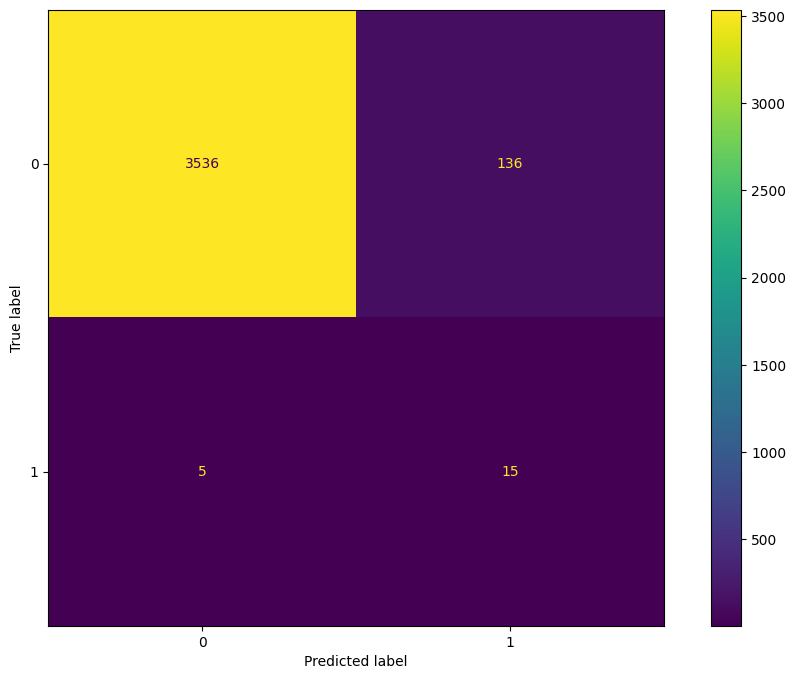

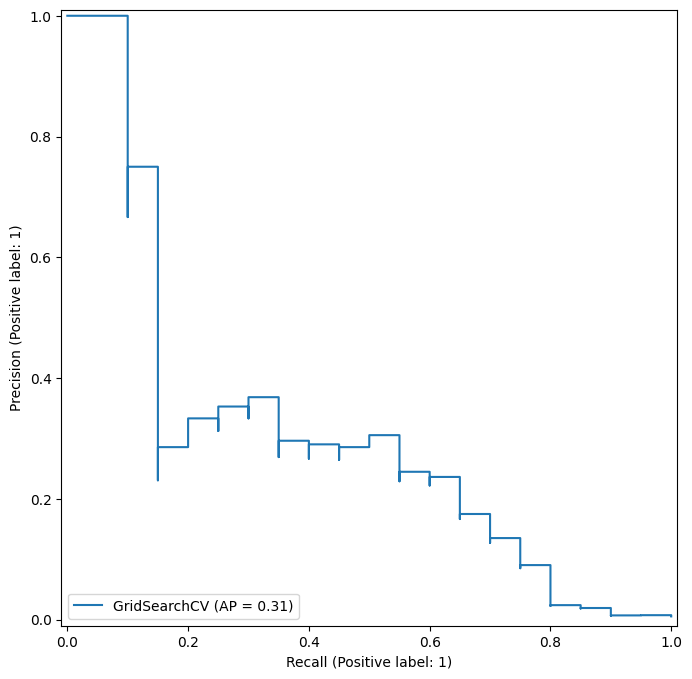

In [89]:
fig, ax = plt.subplots(figsize = (12, 8))
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred,target_names=['Not fraud (0)', 'Fraud (1)']))
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay.from_estimator(model,X_test,y_test, ax = ax)
fig, ax = plt.subplots(figsize = (12, 8))
disp = PrecisionRecallDisplay.from_estimator(model,X_test,y_test, ax = ax)